In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor


import statsmodels.api as sm
import joblib

In [53]:
df = pd.read_csv('/Users/saptarshipal/DATA/ipl_dataset2013/data/IPL IMB381IPL2013.csv')

df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [54]:
df.shape

(130, 26)

In [55]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,130.0,65.500000,37.671829,1.0,33.2500,65.500,97.7500,130.00
AGE,130.0,2.092308,0.576627,1.0,2.0000,2.000,2.0000,3.00
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.5000,542.500,3002.2500,15470.00
T-WKTS,130.0,66.530769,142.676855,0.0,0.0000,7.000,47.5000,800.00
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.2500,835.000,3523.5000,18426.00
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.6500,78.225,86.7900,116.66
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.0000,18.500,106.0000,534.00
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.0000,36.600,45.3250,150.00
CAPTAINCY EXP,130.0,0.315385,0.466466,0.0,0.0000,0.000,1.0000,1.00
RUNS-S,130.0,514.246154,615.226335,0.0,39.0000,172.000,925.2500,2254.00


In [58]:
df.head(2)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.0,0,307,15,20.47,8.9,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.0,0,29,0,0.00,14.5,0.00,2008,50000,50000


In [59]:
df1 = df.copy()
df1.shape

(130, 26)

In [60]:
df2 = df1.drop(columns=['Sl.NO.'])
df2.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [61]:
df2.isnull().sum()

PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [62]:
df2.columns[df2.dtypes =='object']

Index(['PLAYER NAME', 'COUNTRY', 'TEAM', 'PLAYING ROLE'], dtype='object')

In [63]:
for column in df2.columns[df2.dtypes =='object']:
    print(str(column) + ' has ' +str(df2[column].nunique())+" unique values")

PLAYER NAME has 130 unique values
COUNTRY has 10 unique values
TEAM has 17 unique values
PLAYING ROLE has 4 unique values


In [64]:
encoder = LabelEncoder()
df2['COUNTRY'] = encoder.fit_transform(df2['COUNTRY'])
df2['TEAM'] = encoder.fit_transform(df2['TEAM'])
df2['PLAYING ROLE'] = encoder.fit_transform(df2['PLAYING ROLE'])
df2.drop(columns='PLAYER NAME',inplace =True)
df2.head()

,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,2,6,9,0,0,0,0,0.00,0,0.0,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,1,13,2,214,18,657,71.41,185,37.6,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,2,3,6,2,571,58,1269,80.62,288,32.9,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,1,3,0,2,284,31,241,84.56,51,36.8,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,2,3,0,1,63,0,79,45.93,0,0.0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            130 non-null    int64  
 1   COUNTRY        130 non-null    int64  
 2   TEAM           130 non-null    int64  
 3   PLAYING ROLE   130 non-null    int64  
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    int64  
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

<Axes: >

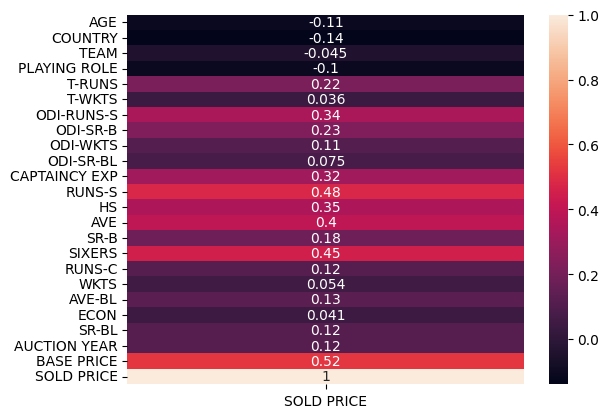

In [68]:
df3 = df2.copy()
sns.heatmap(df3.corr()[['SOLD PRICE']],annot = True)

In [74]:
df3.corr()[['SOLD PRICE']].sort_values(by = ['SOLD PRICE'])

,SOLD PRICE
COUNTRY,-0.139038
AGE,-0.106201
PLAYING ROLE,-0.103657
TEAM,-0.045134
T-WKTS,0.035767
ECON,0.040679
WKTS,0.053796
ODI-SR-BL,0.075408
ODI-WKTS,0.112327
RUNS-C,0.116476
